In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 4.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from collections import defaultdict
import random
from IPython.display import clear_output

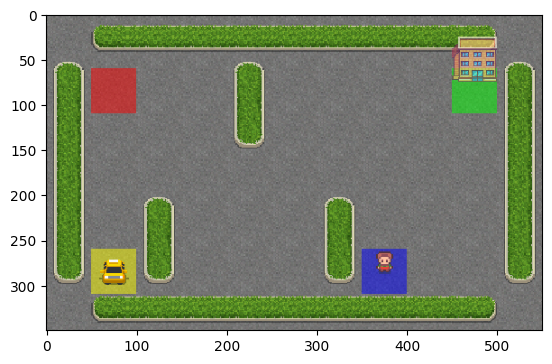

In [3]:
env=gym.make('Taxi-v3',render_mode='rgb_array')
env.reset()
plt.imshow(env.render())

In [4]:
n_s=env.observation_space.n
n_a=env.action_space.n
n_epi=10000
n_ite=1000
disc=0.9
eps=1
alpha=0.01

In [5]:
def pi_eps(pi,s,eps):
  u=random.uniform(0,1)
  if u>=eps:
    a=max(list(range(n_a)),key=lambda x:Q[(s,x)])
  else:
    a=env.action_space.sample()
  return a

In [6]:
def Q_TD_on(n_epi,pi,eps):
  for i in range(n_epi):
    s,_=env.reset()
    a=pi_eps(pi,s,eps)
    done=False
    while not done:
      s1,r,done,_,_=env.step(a)
      a1=pi_eps(pi,s1,eps)
      Q[(s,a)]+=alpha*(r+disc*Q[(s1,a1)]-Q[(s,a)])
      s,a=s1,a1
  return Q

In [7]:
def get_pi(Q):
  pi=np.zeros(n_s,dtype=int)
  for s in range(n_s):
    pi[s]=max(list(range(n_a)),key=lambda x:Q[(s,x)])
  return pi

In [8]:
pi=np.zeros(n_s,dtype=int)
Q=defaultdict(float)

In [9]:
for i in range(n_ite):
  Q=Q_TD_on(n_epi,pi,eps)
  pi_new=get_pi(Q)
  if np.all(pi_new==pi):
    break
  else:
    pi=np.copy(pi_new)
    eps/=(i/10+1)
    print(i,pi,eps)
    clear_output(wait=True)

13 [0 4 4 4 2 0 2 0 0 0 0 0 0 1 1 0 5 0 0 0 0 3 3 3 0 0 0 3 0 0 0 0 3 0 0 0 3
 0 3 3 0 0 0 0 2 0 2 2 0 0 0 0 2 0 2 0 2 2 2 2 0 3 0 3 2 0 2 2 0 0 0 0 0 0
 0 0 2 2 2 2 0 3 3 2 4 0 4 4 0 3 0 0 0 0 0 0 0 5 0 0 0 1 1 1 2 0 2 0 0 0 0
 0 0 2 2 0 1 0 0 0 0 3 1 1 0 0 0 0 0 3 0 3 0 0 0 0 1 0 3 0 0 0 0 0 2 0 2 2
 0 0 0 0 0 2 2 0 0 2 0 2 0 0 3 3 1 0 2 1 0 0 0 3 0 0 0 0 0 2 0 0 0 1 2 0 1
 0 1 1 0 3 0 0 0 0 0 0 3 1 3 0 0 1 1 1 2 0 2 2 0 0 0 0 2 2 2 0 1 2 0 2 0 1
 1 1 2 0 2 2 3 3 0 3 2 2 2 0 1 2 3 2 0 3 3 3 1 0 2 2 3 3 0 3 2 2 2 0 3 1 3
 2 0 3 3 3 1 0 1 1 3 3 0 3 0 0 0 0 3 1 3 0 0 3 3 3 1 0 1 1 3 3 0 3 0 0 0 0
 1 1 3 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 1 1 2 0 1 1 1 1 0 1 1
 0 1 0 1 1 1 1 0 3 3 3 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 0 0 2 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 3 0 1
 0 4 4 0 4 1 1 1 0 1 1 5 1 0 1 1 1 0 0 1 3 1 1 0 1 1 2 1 0 1 1 1 1 0 1 1 1
 1 0 3 1 3 1 0 1 1 1 1 0 1 1 1 1 0 1 2 1 1 0 1 1 2 1 0 1 4 4 4 0 1 1 1 5 0
 3 1 2 1 0 1 1 1 3 0 3

In [10]:
pi_opt=pi
pi_opt

array([0, 4, 4, 4, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 3,
       3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 3, 0, 3, 2, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 3, 3, 2, 4, 0, 4, 4,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 3, 3, 1, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 1,
       3, 0, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 1, 1, 2, 0, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 1, 2, 3, 2, 0, 3,
       3, 3, 1, 0, 2, 2, 3, 3, 0, 3, 2, 2, 2, 0, 3, 1, 3, 2, 0, 3, 3, 3,
       1, 0, 1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 3, 1, 3, 0, 0, 3, 3, 3, 1, 0,
       1, 1, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1, 3, 0, 0,

In [19]:
def test_agent(pi,n_t=100,mode='human',display=True):
  env=gym.make('Taxi-v3',render_mode=mode)
  s,_=env.reset()
  for t in range(n_t):
    a=pi[s]
    s1,r,done,_,_=env.step(a)
    if display:
      print('t=',t,'s=',s,'a=',a,'r=',r,'s\'=',s1,'done=',done)
      clear_output(wait=True)
    s=s1
    if done:
      if display:
        if r==20:
          print('YOU WON! Reward:%s'%(r))
        else:
          print('YOU LOST.')
      break
  if not done:
    if display:
      print('LOST:too many moves.')
  win=True if r==20 else False
  return win

In [20]:
n_t=1000
test_agent(pi_opt,n_t)

YOU WON! Reward:20


True

In [21]:
n_game=1000
n_win=0
for i in range(n_game):
  win=test_agent(pi_opt,mode=None,display=False)
  if win:
    n_win+=1
win_rate=n_win/n_game
print('Games play:{},# of wins:{}'.format(n_game,n_win))
print('Win Rate:{}%'.format(100*win_rate))

Games play:1000,# of wins:964
Win Rate:96.39999999999999%
